### Load a map

In [1]:
from pymapmanager import mmMap

# load a map
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.37 seconds.


### Get the number of segments in the map

In [2]:
print(m)

map:rr30a map segments:5 stacks:9 total object:2467


## Using a dictionary to specify what annotations to get

Here we will use a plot dict to specify x, y, z stats as well as the segment

In [4]:
from pymapmanager.mmUtil import newplotdict

plotDict = newplotdict()
plotDict['plotbad'] = False
plotDict['xstat'] = 'days'
plotDict['ystat'] = 'pDist'
plotDict['zstat'] = 'ubssSum_int2' #'sLen3d_int1' #swap in any stat you like, e.g. 'ubssSum_int2'
plotDict['segmentid'] = 1
plotDict = m.getMapValues3(plotDict)

if 0:
    for key, value in plotDict.iteritems() :
        print(key)
    
    plotDict['dynamics']

mmMap.getMapValues3() took 0.05 seconds


## Plot dynamics with color

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

colorArray = np.array(['k', 'g', 'r', 'b', 'y']) # None, Add, Subtract, Transient, Persistent
mRun, nSess = plotDict['dynamics'].shape
myColors = np.chararray([mRun,nSess], itemsize=9)
myColors[:] = colorArray[0]
goodIdx = ~np.isnan(plotDict['dynamics'])

myColors[goodIdx] = colorArray[plotDict['dynamics'][goodIdx].astype('int')]

# plot with matplotlib
plt.scatter(plotDict['x'], plotDict['y'], c=myColors.flatten())
plt.plot(plotDict['x'].transpose(), plotDict['y'].transpose(), '-', linewidth=1.0, color='gray')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Dendrite Position (um)', fontsize=16)
plt.show()

ValueError: c of shape (423,) not acceptable as a color sequence for x with size 423, y with size 423

## Use our plot functions

The mmMapPlot2 class has useful plot function to get standard Map Manager plots along with colorizing the dynamics.

We are plotting to matplotlib figures so we need to use some magic with `%matplotlib notebook`.

map rr30a loaded in 0.3 seconds.


<IPython.core.display.Javascript object>


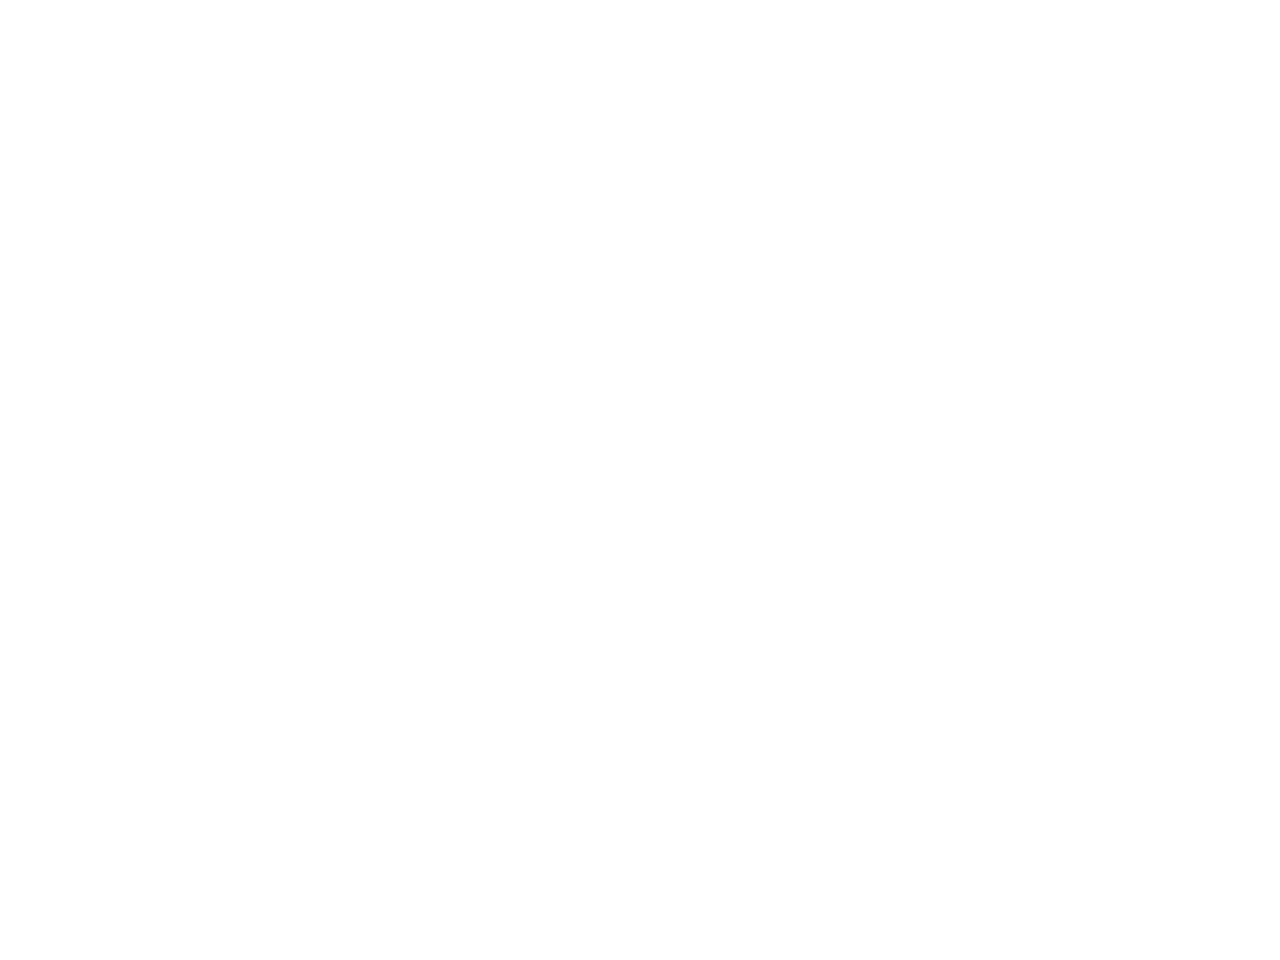

TypeError: '>=' not supported between instances of 'list' and 'int'

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

from pymapmanager import mmMap
from pymapmanager.mmUtil import newplotdict
from pymapmanager.mmMapPlot2 import mmMapPlot2

# load a map
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

# creat a plot for the map
myPlot = mmMapPlot2(m)

# mmMapPlot2 will plot to a figure
fig = plt.figure()

# specify the segment to plot
plotDict = newplotdict()
plotDict['segmentid'] = [1]

# plot the canonical map manager map
myPlot.plotMap0(fig,plotDict)

fig.show()



### Now use myPlot.plotMap(fig,plotDict) to plot any two map values.

- Here we will set 'plotbad' to False so we do not get 'bad' annotations in the results.
- The mmMapPlot2.plotMap(fig,plotDict) function will plot any x/y values you specify in plotDict

<IPython.core.display.Javascript object>


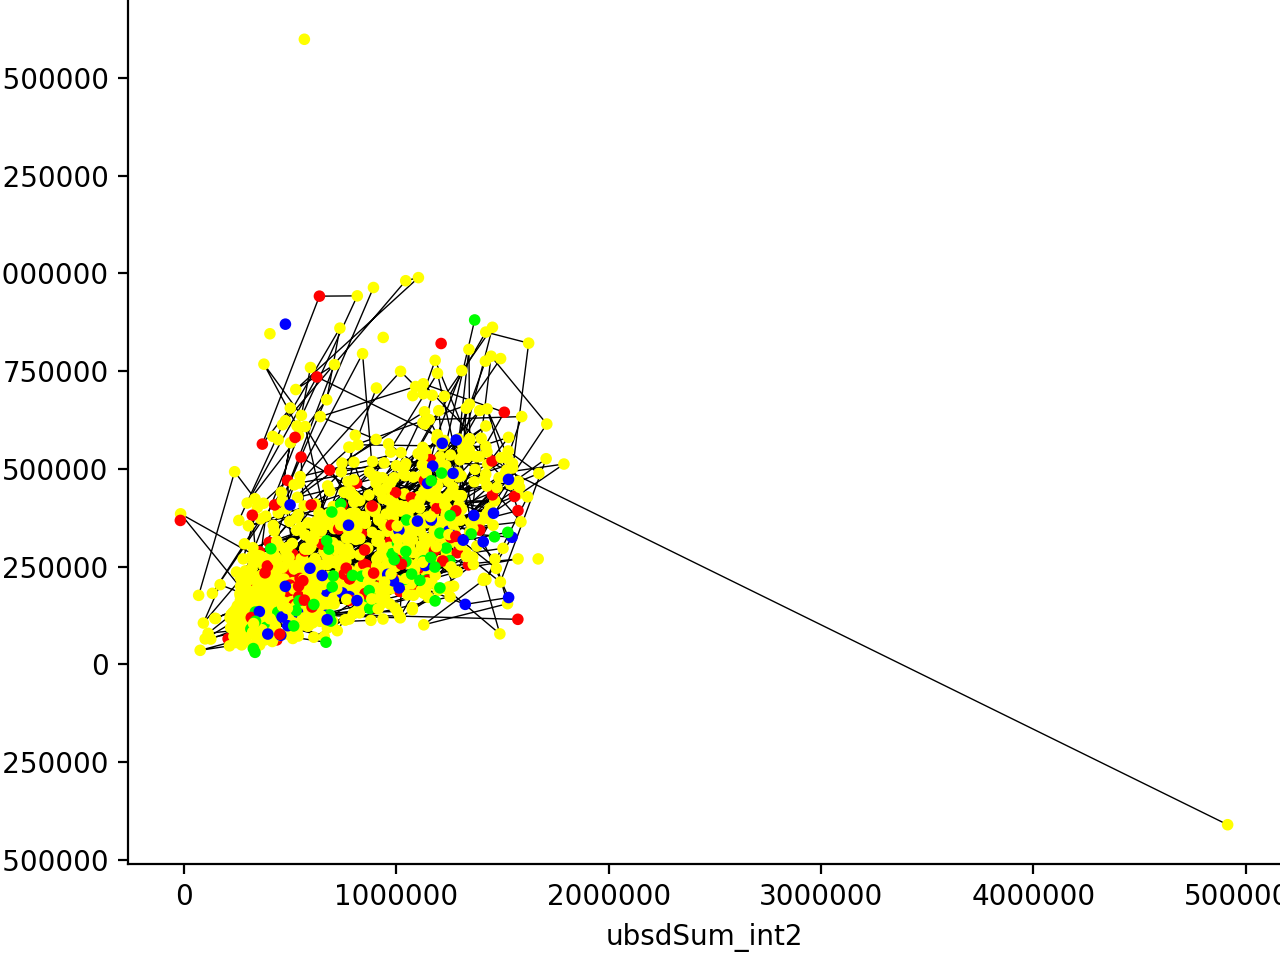

mmMap.getMapValues3() took 0.05 seconds


In [7]:
myPlot = mmMapPlot2(m)

# mmMapPlot2 will plot to a figure
fig = plt.figure()

# specify the segment to plot with a plotDist
plotDict = newplotdict()
plotDict['plotbad'] = False
plotDict['xstat'] = 'ubsdSum_int2'
plotDict['ystat'] = 'ubssSum_int2'
plotDict['segmentid'] = None # all segments

# plot the canonical map manager map
myPlot.plotMap(fig,plotDict)

fig.show()

### We are not limited to plotting a single figure, we can plot a number of figures.

Here we plot a canonical spine map for each map segment in a map.

<IPython.core.display.Javascript object>


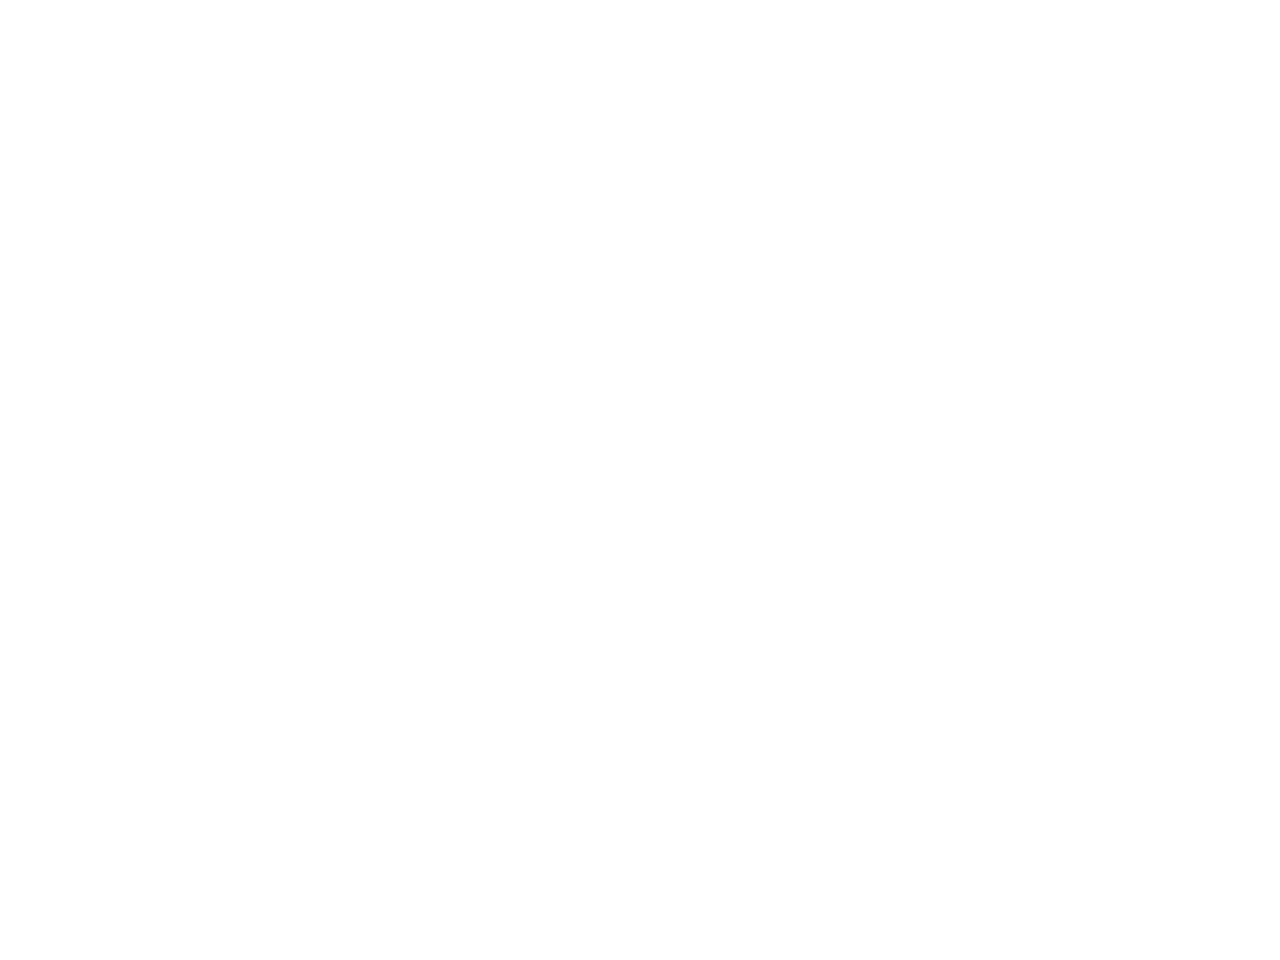

TypeError: '>=' not supported between instances of 'list' and 'int'

In [8]:
plotDict = newplotdict()
for i in range(m.numMapSegments):
    # the current map segment we will plot
    plotDict['segmentid'] = [i]

    fig = plt.figure()
    myPlot.plotMap0(fig,plotDict)
    fig.show()

### Calculate spine dynamics for each segment in a map

In [9]:
import pandas as pd
from IPython.display import display # displays pretty table in ipython

from pymapmanager.mmMap import mmMap
from pymapmanager.mmUtil import newplotdict
from pymapmanager.mmMapAnalysis import getMapDynamics

# load a map
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

plotDict = newplotdict()
plotDict = getMapDynamics(m, plotDict) # this is a stand-alone function, you can write your own

# this will make m.numMapSegments tables (5 in this example)
for i, segmentReport in enumerate(plotDict):
    print '\n\n=== map segment', str(i), '==='
    display(pd.DataFrame.from_dict(segmentReport, orient='index'))

SyntaxError: invalid syntax (<ipython-input-9-9baccd16914d>, line 17)